# **Loading the required packages**

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# **Loading and seeing the dataset**

In [3]:
crop = pd.read_csv('/content/Crop_recommendation.csv')

In [4]:
# see the data

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,NaN,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# see the info

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2090 non-null   float64
 5   ph           2086 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# see missing values

crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,110
ph,114
rainfall,0
label,0


# **Data Preprocessing**

In [7]:
# separate features and target
X = crop.drop('label', axis=1)
y = crop['label']

**Train test split**

In [8]:
# split the data into 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

**Solve missing values**

To solve the missing values, I will use KNN Imputer.

In [9]:
# 'n_neighbors=5' means it looks at 5 similar soil samples.
# I use k=5 in this because it is a good default for data preprocessing step.

imputer = KNNImputer(n_neighbors=5)

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

**Feature Scaling**

For feature scaling, I will use MinMaxScaler to bring all features to 0-1 range

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

**Missing value Check**

In [11]:
# Let's see missing values after using KNN imputer

# Check Train Data
print("Missing value for train before:", X_train.isnull().sum().sum())
print("Missing value for train after:", np.isnan(X_train_imputed).sum())

# Check Test Data
print("Missing value for test before", X_test.isnull().sum().sum())
print("Missing value for test after:", np.isnan(X_test_imputed).sum())

Missing value for train before: 168
Missing value for train after: 0
Missing value for test before 56
Missing value for test after: 0


# **Data Training**

For training phrase, I will use **KNN** method. SO, first, I will find best K value

In [12]:
# make a range of k values to test
k_list = range(1, 20, 2)
best_k = 0
best_score = 0

# find the best k
for k in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # I used cv=5 to calculate the accuracy for the model as it is the standard default
    scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"The best number of neighbors (k) is: {best_k}")

The best number of neighbors (k) is: 3


In [13]:
model = KNeighborsClassifier(n_neighbors=3)
# I used the value of k=3 from the above result

In [14]:
# training completed after this fit
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# **Data Testing**

In [15]:
y_pred = model.predict(X_test_scaled)

**Accuracy**

In [16]:
acc = accuracy_score(y_test, y_pred)
acc

0.9704545454545455

The accuracy is 97%.

In [17]:
# I will make a classification report to see precision, recall and f1-score for each crop

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

**Precision, recall and F-1 score**

In [18]:
# We can see precision, recall and f1-score in the above but I want to show for each again

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall:    {recall * 100:.2f}%")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score:  {f1 * 100:.2f}%")

Precision: 97.53%
Recall:    97.05%
F1-Score:  97.10%


The precision is 97.53%, Recall is 97.05% and F1-score is 97.10% in my model.

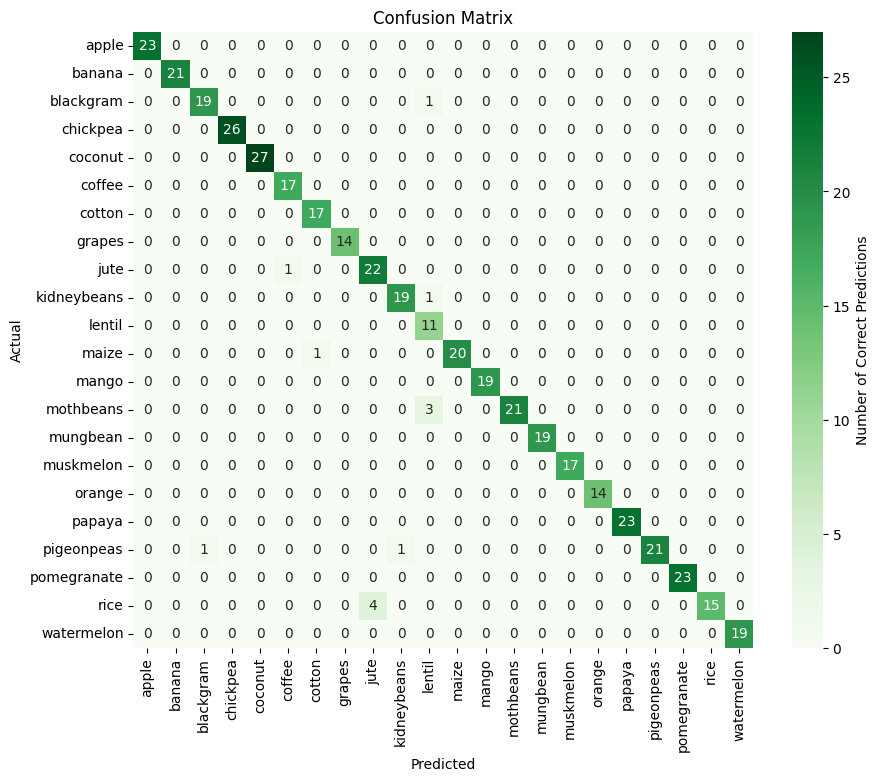

In [19]:
# Let's see confusion matrix to see if my model is reliable.

# sort the crop names alphabetically
names = sorted(y_test.unique())

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=names, yticklabels=names,
            cbar_kws={'label': 'Number of Correct Predictions'})

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=90) # rotate text to fit, otherwise the text are overlapping
plt.show()

We can see that my model is highly reliable. It only mixes up crops that require similar soil, like Rice and Jute.

# **Saving**

In [20]:
# I will use the below code to save my model file as pkl
# I found this code online

data_to_save = {
    'model': model,
    'scaler': scaler,
    'imputer': imputer
}

with open('model.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("saved the model pkl")

saved the model pkl


Thank you Professor for looking at my code.